### OkCupid - 2
NOTE: this is the second assignment with this dataset so I just added to the first one some new graphs.

### Import all relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data from csv

In [2]:
profiles = pd.read_csv("profiles.csv")
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54461 non-null object
essay1         52375 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49099 non-null object
essay6         46175 non-null object
essay7         47496 non-null object
essay8         40732 non-null object
essay9         47344 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

### Data visualization

#### 1)
In my opinion the most important parameter (especially when the datset is taken from online dating service) is the "sex" parameter. So, first of all we want to see the ratio between males and females in our database:

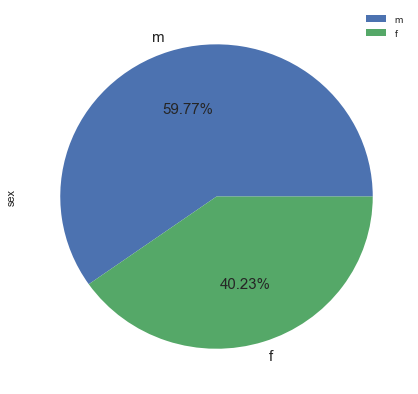

In [4]:
profiles["sex"].value_counts().plot.pie(figsize=(7, 7),legend=True,autopct='%.2f%%',fontsize=15)

This time I wanted to check how age affects some parameters so I added new column to the dataset:

In [5]:
age_level_str   = ["18-25","26-30","31-35","36-40","41-50","51-110"]
age_level_range = [range(18,26),range(26,31),range(31,36),range(36,41),range(41,51),range(51,111)]
ages_map        = dict(zip(age_level_range,age_level_str))

def get_age_level(my_val,my_map):
    for key in my_map:
        if my_val in key:
            return my_map[key]
        
profiles["age_level"] = profiles["age"].apply(lambda x: get_age_level(x,ages_map))

In order to investigate by "sex" we need to split our dataset to dataset per sex:

In [6]:
sexes = list(profiles["sex"].unique())
profiles_by_sex = {}

for sex in sexes:
    profiles_by_sex[sex] = profiles[profiles["sex"] == sex]

#### 2)
Lets start with simple plots that will show distribution of **ages** and **hieghts** by sex:

C:\Users\asafa\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


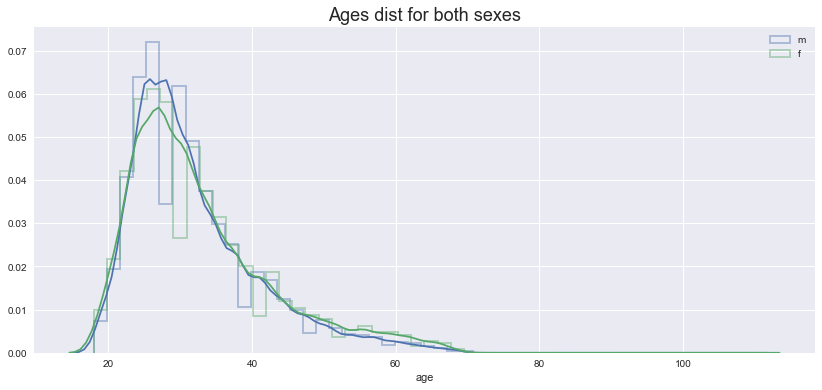

In [7]:
fig,ax = plt.subplots(figsize = (14, 6))
ax.set_title("Ages dist for both sexes", fontsize = 18)

for sex in sexes:
    sns.distplot(profiles_by_sex[sex]["age"], hist_kws = {'histtype':'step',"linewidth":2}, norm_hist = True)
    
ax.legend(sexes)

C:\Users\asafa\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


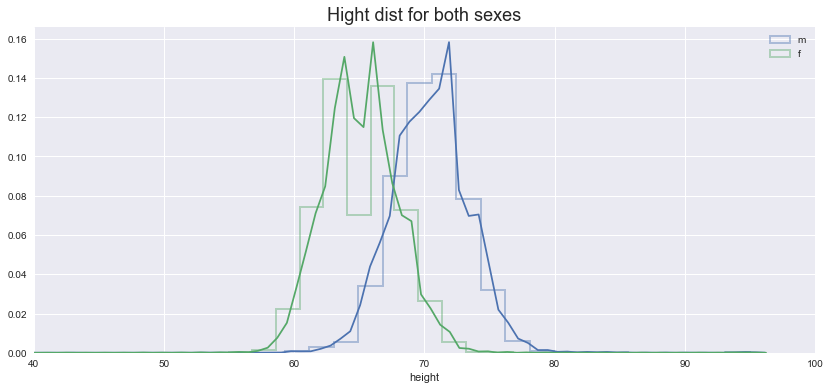

In [8]:
fig,ax = plt.subplots(figsize = (14, 6))
ax.set_title("Hight dist for both sexes", fontsize = 18)
ax.set_xlim([40, 100])

for sex in sexes:
    sns.distplot(profiles_by_sex[sex]["height"].dropna(), hist_kws = {'histtype':'step',"linewidth":2})

ax.legend(sexes)

From the first histogram we can learn that both sexes seek for partner pretty much on the same ages.
In the second we can see clearly that males are higher than females in average.

#### 3)
Now, I want to investigate the correlation between **drink/smoking/drugs** habits for each sex.

In order to do so we should first map all those categories into simple rating scale. I chose to rate each into 3 levels as follow:

In [9]:
#0 - low
#1 - middle
#2 - high

drinks_map = {'not at all':0,'rarely':0,'socially':1,'often':1,'very often':2,'desperately':2}
drugs_map  = {'never':0,'sometimes':1,'often':2}
smokes_map = {'no':0,'trying to quit':1,'when drinking':1,'sometimes':1,'yes':2}

For each sex I calculated to corr matrix and ploted it using seaborn heatmap:

In [10]:
corrmat = {}

for sex in sexes:
    drink_smoke_habits = profiles_by_sex[sex][["drinks","smokes","drugs"]].dropna()
    drink_smoke_habits["drinks"] = drink_smoke_habits["drinks"].map(drinks_map)
    drink_smoke_habits["smokes"] = drink_smoke_habits["smokes"].map(smokes_map)
    drink_smoke_habits["drugs"]  = drink_smoke_habits["drugs"].map(drugs_map)
    print("drink-smoke-drugs habits for {one}:\n{two}\n".format(one = sex, two = drink_smoke_habits.head()))
    corrmat[sex] = drink_smoke_habits.corr()

drink-smoke-drugs habits for m:
    drinks  smokes  drugs
0        1       1      0
1        1       0      1
4        1       0      0
9        0       0      0
11       1       0      0

drink-smoke-drugs habits for f:
    drinks  smokes  drugs
7        1       0      0
13       1       0      0
14       1       0      0
17       1       0      0
20       1       0      0



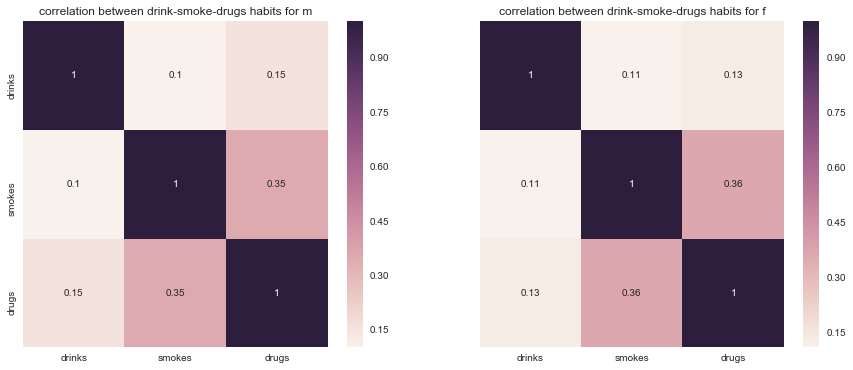

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6), ncols = 2, sharey = True)
axes = dict(zip(sexes,[ax1, ax2]))

for sex in sexes:
    axes[sex].set_title("correlation between drink-smoke-drugs habits for " + sex)
    sns.heatmap(corrmat[sex], vmax = 1, annot = True, ax = axes[sex])

From the heatmaps above we can see that in both cases we have pretty much the same correlation values --> we can learn that the correlation **is NOT** affected by gender.

It is interesting to see that drinking habits has low correlation with smoking and drugs habits while between the last 2 there is higher correlation. 

In order to see it, we can use seaborn clustermap (only for males for example):

C:\Users\asafa\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


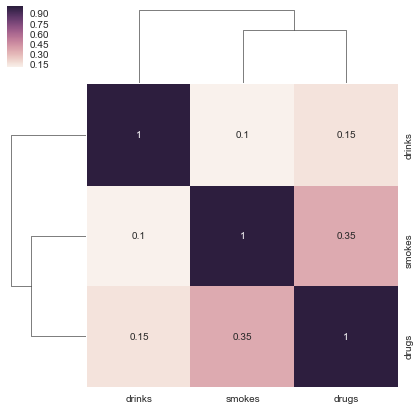

In [12]:
sns.clustermap(corrmat["m"], vmax = 1, annot = True, figsize = (7, 7))

#### 4)
Next thing I want to explore is "body type". First I organized all body types in the following order:

In [13]:
body_types = ['skinny', 'thin', 'fit', 'average', 'athletic', 'curvy', 'a little extra', 'full figured', 'jacked', 
              'rather not say', 'used up', 'overweight']

d = {}

for sex in sexes:
    d[sex] = profiles_by_sex[sex]["body_type"].value_counts(normalize = True)

d["total"] = profiles["body_type"].value_counts(normalize = True)

body_type_dist = pd.DataFrame(d).reset_index("body_type")
body_type_dist.columns = ["body_type", "f", "m", "both_sexes"]
body_type_dist.head()

,body_type,f,m,both_sexes
0,a little extra,0.038339,0.054399,0.048106
1,athletic,0.107827,0.286136,0.216267
2,average,0.262445,0.271754,0.268106
3,curvy,0.177968,0.003400,0.071802
4,fit,0.206921,0.249127,0.232589


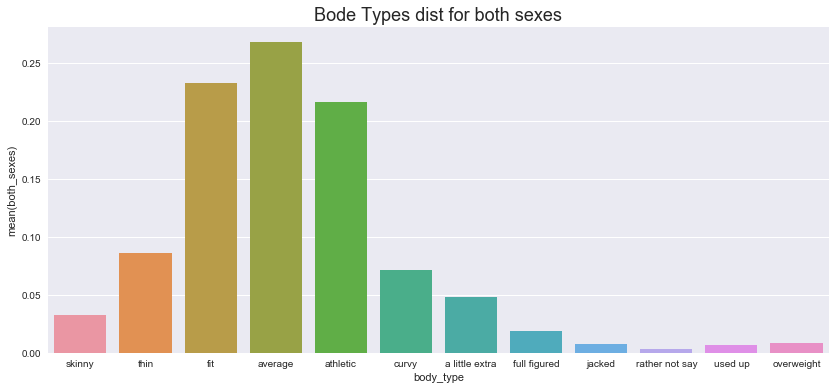

In [14]:
fig,ax = plt.subplots(figsize = (14, 6))
ax.set_title("Bode Types dist for both sexes", fontsize = 18)
sns.barplot(x = "body_type", y = "both_sexes", data = body_type_dist, order = body_types)

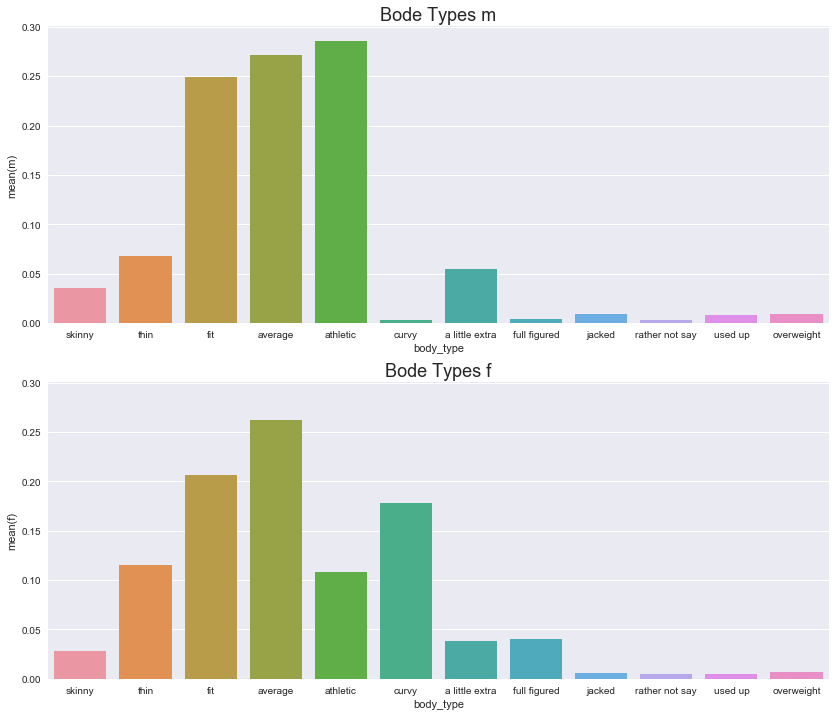

In [15]:
fig, (ax1, ax2) = plt.subplots(figsize = (14, 12), nrows = 2, sharey = True)
axes = dict(zip(sexes,[ax1, ax2]))

for sex in sexes:
    axes[sex].set_title("Bode Types " + sex, fontsize = 18)
    sns.barplot(x = "body_type", y = sex, order = body_types, data = body_type_dist, ax = axes[sex])

We can see that the distribution of body types for both cases is pretty much the same but we still can find some very interesting insights.

The **first** is that much more males define themselves as athletics than females (even more than "average").

The **second** is that the definitions **"curvy"** and **"full figured"** are almost 100% feminine as males don't use this definitions at all.

#### 5)
The next thing I wanted to check is which gender writes more. I sumed all essay letters for each line and ploted this sum for each gender:

In [16]:
all_essays = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

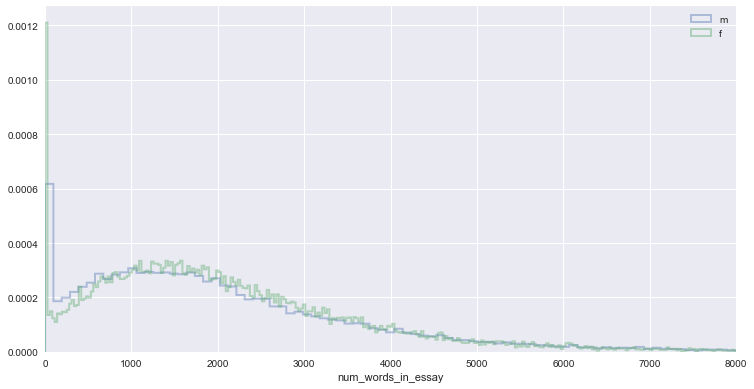

In [17]:
fig = plt.figure(figsize = (12,6))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim([0,8000])

essay_check = {}

for sex in sexes:
    essay_check[sex] = profiles_by_sex[sex][all_essays + ["age_level"]]
    essay_check[sex] = essay_check[sex].replace(np.nan, '', regex = True)
    essay_check[sex]["num_words_in_essay"] = 0
    essay_check[sex]["essay_total"] = ""
    for essay in all_essays:
        essay_check[sex]["essay_total"] += essay_check[sex][essay]
    essay_check[sex]["num_words_in_essay"] = essay_check[sex]["essay_total"].apply(lambda x: len(x))
    sns.distplot(essay_check[sex]["num_words_in_essay"], bins = 1000, hist_kws = {'histtype':'step',"linewidth":2}, kde = False, norm_hist = True)

ax.legend(sexes)

From this graph we can see that there are 3 major areas:

    1) 0-1000 words:    in this area we can see that males have a preference over females.
    2) 1000-4000 words: in this area females have a preference over males.
    3) 4000 and on:     no preference for specific gender.

We can get the following conclusioin: women "dig" more than men, but if you're a "true digger" it's not matter which gender you belong. 

#### 6)
Now i'll try to find a dapandency between age and essay lenght.

In [18]:
essay_check_total = pd.concat(essay_check, keys = list(essay_check)).reset_index(level = 0)
essay_check_total.rename(columns = {'level_0':'sex'},inplace = True)
essay_check_total.drop(all_essays, axis=1, inplace=True)
essay_check_total.head()

,sex,age_level,num_words_in_essay,essay_total
0,m,18-25,2635,about me:<br />\n<br />\ni would love to think...
1,m,31-35,1444,i am a chef: this is what that means.<br />\n1...
2,m,36-40,5508,"i'm not ashamed of much, but writing public te..."
3,m,18-25,468,i work in a library and go to school. . .readi...
4,m,26-30,716,hey how's it going? currently vague on the pro...


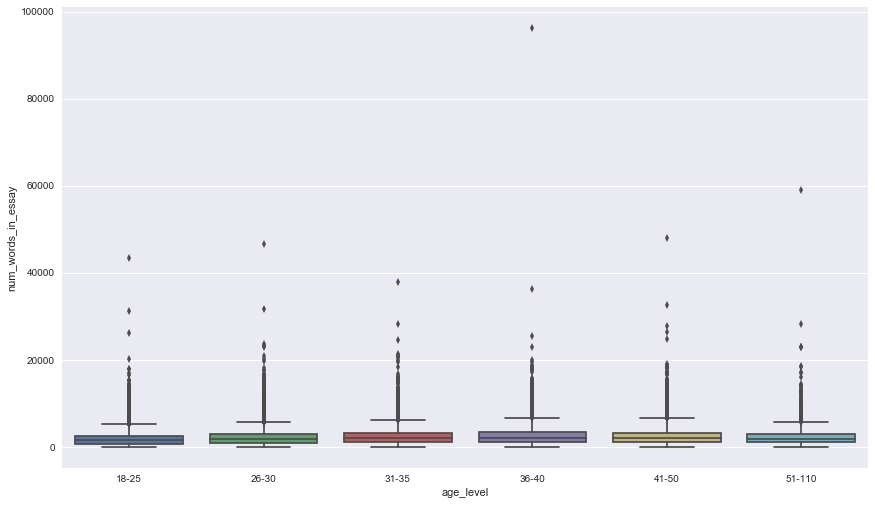

In [19]:
fig = plt.figure(figsize = (14,8))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.boxplot(x = "age_level", y = "num_words_in_essay", data = essay_check_total, order = age_level_str)

Here I tried to plot a boxplot of num_of_words per age_level. We can see there are some outliers that makes it hard to understand what happens here. So I filterred all of this outliers in the following way:

In [20]:
import itertools

def remove_outliers(x, y, data, hue):
    filtered_dataframes = {}
    for hue_key,x_key in itertools.product(data[hue].unique(),data[x].unique()):
        if (hue_key != None) and (x_key != None): 
            temp = data[data[hue] == hue_key]
            temp = temp[temp[x]   == x_key]
            filtered_dataframes[hue_key,x_key] = temp[np.abs(temp[y] - temp[y].mean()) <= (3*temp[y].std())]
    return pd.concat(filtered_dataframes, keys = list(filtered_dataframes))

I chose to remove any value that is far from the mean more than 3 std().

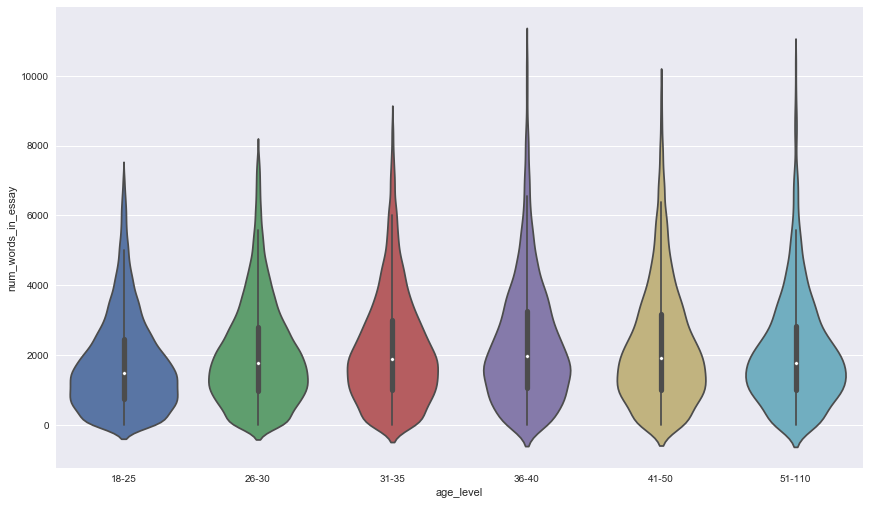

In [21]:
essay_check_wo_outliers = remove_outliers(y = "num_words_in_essay", data = essay_check_total, x = "age_level", hue = "sex")

fig = plt.figure(figsize = (14,8))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.violinplot(x = "age_level", y = "num_words_in_essay", data = essay_check_wo_outliers, order = age_level_str)

Now we can see what's really happens here. We can see that number_of_words is increases as the age increases till the age of "36-40" and then it deceases again.
Lets see if we can see something interesting if we split it by sex:

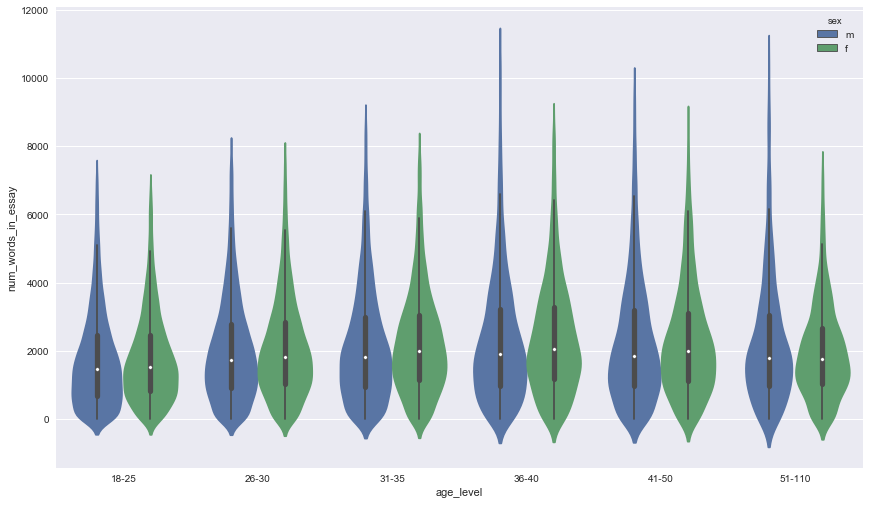

In [22]:
fig = plt.figure(figsize = (14,8))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.violinplot(x = "age_level", y = "num_words_in_essay", data = essay_check_wo_outliers, hue = "sex", order = age_level_str)

We can see that still number of words increases as before but now we can also see that along the way females write more than males.

#### 7)
Now we will see how ages affects the usage of drugs:

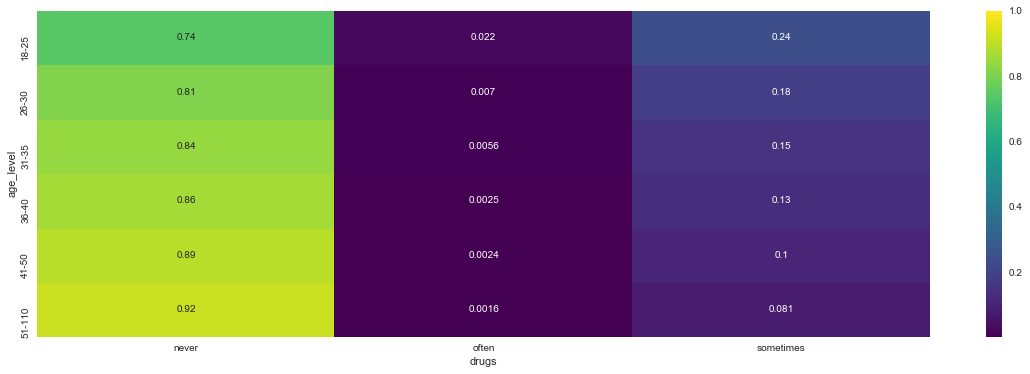

In [23]:
age_groupby = profiles.groupby('age_level')['drugs'].value_counts(normalize=True).unstack().dropna(axis=1)
plt.figure(figsize=(20,6))
sns.heatmap(age_groupby,cmap='viridis',vmax = 1, annot = True)

From the above we can see 2 major points:
      1. Regardless to age, when it comes to drugs usage, most of people "never" use it, some use it "somtimes" and only few use it "often".
      2. We can see that as older you get the probabilty for drug usage get smaller. 

#### 8)
The last thing I want to test is how "orientation" affected by sex and ages:

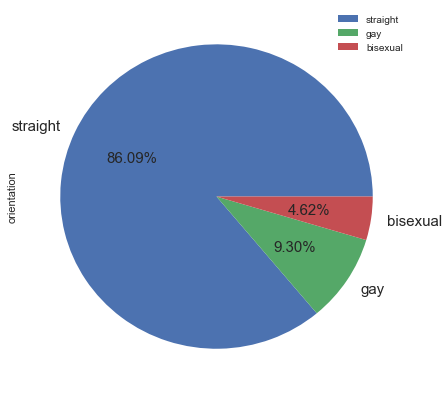

In [24]:
profiles["orientation"].value_counts().plot.pie(figsize=(7, 7),legend=True,autopct='%.2f%%',fontsize=15)

Lets split orientation by ages:

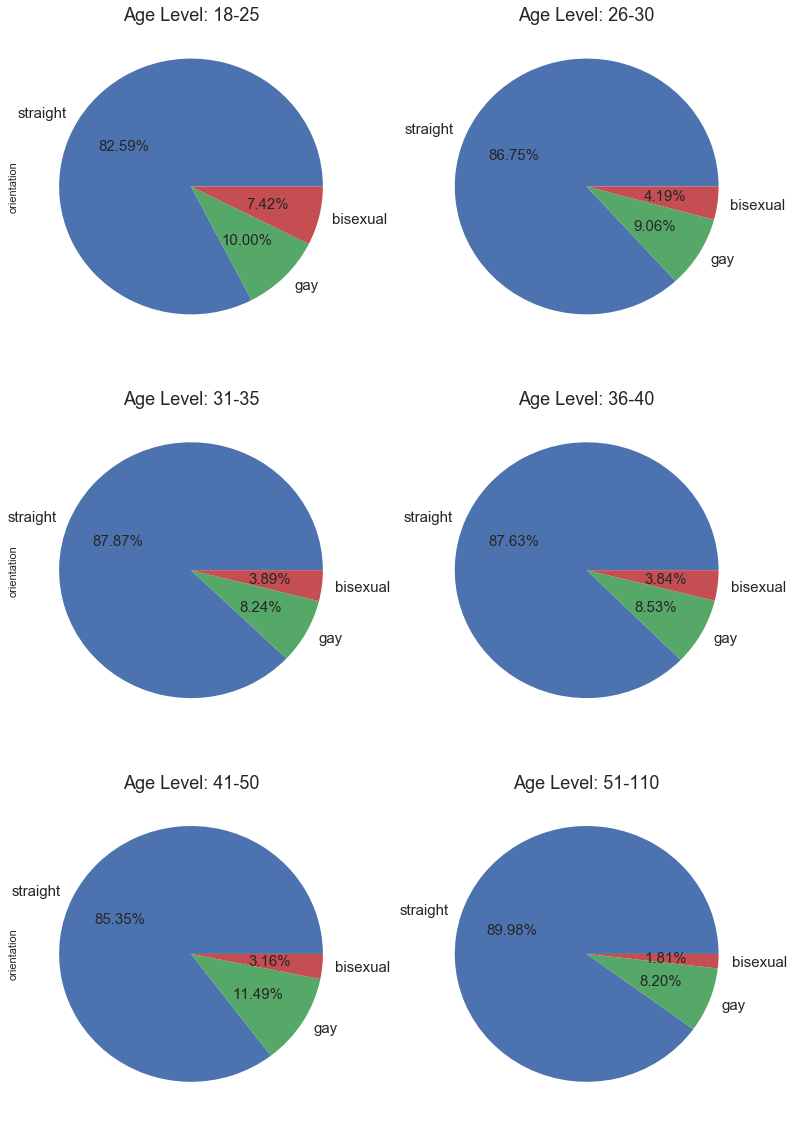

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 2, sharey = True)

axes = dict(zip(age_level_str,[ax1[0], ax1[1], ax2[0], ax2[1], ax3[0], ax3[1]]))

for age_level in age_level_str:
    axes[age_level].set_title("Age Level: " + age_level, fontsize = 18)
    profiles[profiles["age_level"] == age_level]["orientation"].value_counts().plot.pie(figsize=(13, 20),autopct='%.2f%%',fontsize=15, ax = axes[age_level])


we can see that age affects orientation a bit: as more older as you get the probabilty to be strait is bigger and to be bisexual is lower.
Lets split it by sex now:

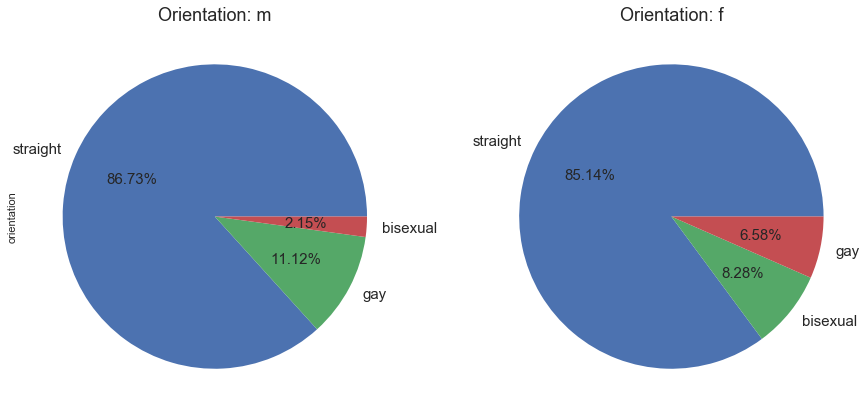

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)

axes = dict(zip(sexes,[ax1, ax2]))

for sex in sexes:
    axes[sex].set_title("Orientation: " + sex, fontsize = 18)
    profiles[profiles["sex"] == sex]["orientation"].value_counts().plot.pie(figsize=(15, 7),autopct='%.2f%%',fontsize=15, ax = axes[sex])


we can see that the percentage of straits is pretty much the same but the distribution between gay and bisexual has a huge diference. the persentage of bisexual males is pretty low while in the females side it is greater than gay percentage!

#### 9)
And just for the fun we can look at this anecdote: 

Lets look at all "smokers when drinking":

In [27]:
smoke_when_drink = profiles[profiles["smokes"] == "when drinking"]
smoke_when_drink["drinks"].value_counts()

socially       2314
often           482
rarely          119
very often       57
desperately      33
not at all       13
Name: drinks, dtype: int64

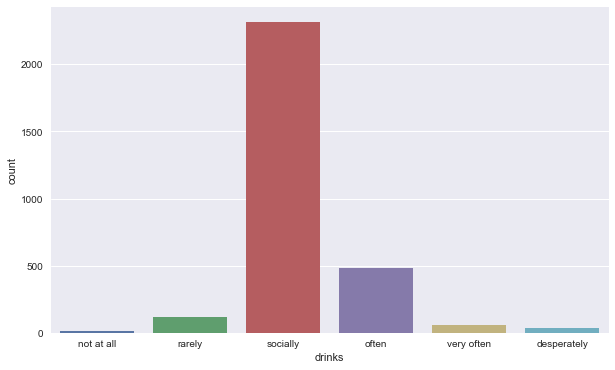

In [28]:
fig,ax = plt.subplots(figsize = (10, 6))
sns.countplot(smoke_when_drink["drinks"], order = ["not at all", "rarely", "socially", "often", "very often", "desperately"])

13 people **smokes only when drinking** but they **never drink**. The conclusion is simple:

13 people could write that they never smoke but they didn't want to be total "sachi's".